# Statistical Analysis of Bitcoin Dataset

## 1. Importing Required Libraries

In [2]:
import pandas as pd      # For data manipulation
import numpy as np       # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns    # For advanced visualizations
import scipy.stats as stats  # For statistical tests

## 2. Loading and Exploring the Dataset

In [3]:
# Load the dataset
df=pd.read_csv(r"/content/btcusd_1-min_data.csv")

In [4]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,9.833180e+05,983318.000000,983317.000000,983317.000000,983317.000000,983317.000000
mean,1.354912e+09,50.691467,50.719302,50.656225,50.687583,4.174010
std,1.703158e+07,61.239729,61.288515,61.173980,61.230122,25.287492
min,1.325412e+09,3.800000,3.800000,3.800000,3.800000,0.000000
25%,1.340162e+09,6.580000,6.580000,6.580000,6.580000,0.000000
50%,1.354912e+09,13.100000,13.100000,13.100000,13.100000,0.000000
75%,1.369661e+09,98.150000,98.200000,98.110000,98.150000,0.326740
max,1.384411e+09,405.970000,405.970000,405.970000,405.970000,2958.477574


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983318 entries, 0 to 983317
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  983318 non-null  float64
 1   Open       983318 non-null  float64
 2   High       983317 non-null  float64
 3   Low        983317 non-null  float64
 4   Close      983317 non-null  float64
 5   Volume     983317 non-null  float64
 6   datetime   983197 non-null  object 
dtypes: float64(6), object(1)
memory usage: 52.5+ MB


## 3. Data Preprocessing


### Check and handle missing values.


In [6]:
df.isnull().sum()

,0
Timestamp,0
Open,0
High,1
Low,1
Close,1
Volume,1
datetime,121


In [7]:
df[df['datetime'].isnull()].head()

,Timestamp,Open,High,Low,Close,Volume,datetime
443279,1.352009e+09,10.49,10.49,10.49,10.49,0.000000,NaN
443280,1.352009e+09,10.49,10.49,10.49,10.49,0.000000,NaN
443281,1.352009e+09,10.49,10.49,10.49,10.49,0.000000,NaN
443282,1.352009e+09,10.49,10.49,10.49,10.49,0.000000,NaN
443283,1.352009e+09,10.49,10.49,10.49,10.49,0.260338,NaN


### Convert UNIX timestamp to readable datetime format

In [8]:
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='s')

In [9]:
df.isnull().sum()


,0
Timestamp,0
Open,0
High,1
Low,1
Close,1
Volume,1
datetime,0


## 4. Cleaning the Data

### Remove unnecessary columns like Timestamp which aren’t needed for numeric/statistical calculations.

In [10]:
# Droping the 'Timestamp' column as it's not needed for numeric analysis
df_numeric = df.drop(columns=['Timestamp'])
df_numeric.describe()


,Open,High,Low,Close,Volume,datetime
count,983318.000000,983317.000000,983317.000000,983317.000000,983317.000000,983318
mean,50.691467,50.719302,50.656225,50.687583,4.174010,2012-12-07 20:19:30.000002048
min,3.800000,3.800000,3.800000,3.800000,0.000000,2012-01-01 10:01:00
25%,6.580000,6.580000,6.580000,6.580000,0.000000,2012-06-20 03:10:15
50%,13.100000,13.100000,13.100000,13.100000,0.000000,2012-12-07 20:19:30
75%,98.150000,98.200000,98.110000,98.150000,0.326740,2013-05-27 13:28:45
max,405.970000,405.970000,405.970000,405.970000,2958.477574,2013-11-14 06:38:00
std,61.239729,61.288515,61.173980,61.230122,25.287492,NaN


In [11]:
df.drop(columns=['Timestamp'], inplace=True)

## 5. Statistical Analysis

In [12]:
df_numeric.describe()

,Open,High,Low,Close,Volume,datetime
count,983318.000000,983317.000000,983317.000000,983317.000000,983317.000000,983318
mean,50.691467,50.719302,50.656225,50.687583,4.174010,2012-12-07 20:19:30.000002048
min,3.800000,3.800000,3.800000,3.800000,0.000000,2012-01-01 10:01:00
25%,6.580000,6.580000,6.580000,6.580000,0.000000,2012-06-20 03:10:15
50%,13.100000,13.100000,13.100000,13.100000,0.000000,2012-12-07 20:19:30
75%,98.150000,98.200000,98.110000,98.150000,0.326740,2013-05-27 13:28:45
max,405.970000,405.970000,405.970000,405.970000,2958.477574,2013-11-14 06:38:00
std,61.239729,61.288515,61.173980,61.230122,25.287492,NaN


## Discriptive Statistics


### i. Measure of Central Tendency

In [13]:
df_numeric = df.drop(columns=['datetime']) # Timestamp removed

mean = df_numeric.mean()
mode = df_numeric.mode().iloc[0]
median = df_numeric.median()

print("-" * 40)
print("Mean of each column:\n")
print(mean)

print("-" * 40)
print("Median of each column:\n")
print(median)

print("-" * 40)
print("Mode of each column:\n")
print(mode)

----------------------------------------
Mean of each column:

Open      50.691467
High      50.719302
Low       50.656225
Close     50.687583
Volume     4.174010
dtype: float64
----------------------------------------
Median of each column:

Open      13.1
High      13.1
Low       13.1
Close     13.1
Volume     0.0
dtype: float64
----------------------------------------
Mode of each column:

Open      5.0
High      5.0
Low       5.0
Close     5.0
Volume    0.0
Name: 0, dtype: float64


### ii. Measure of Dispersion

In [14]:
data_range = df_numeric.max() - df_numeric.min() # Range
variance = df_numeric.var() # variance
std_dev = df_numeric.std() # Standard Deviation
mad = df_numeric.apply(lambda x: np.mean(np.abs(x - x.mean()))) # Mean Absolute Deviation

# Quartiles
q1 = df_numeric.quantile(0.25)
q2 = df_numeric.quantile(0.50)  # Median
q3 = df_numeric.quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

print("-" * 50)
print("Range:\n", data_range, "\n")
print("-" * 50)
print("Variance:\n", variance, "\n")
print("-" * 50)
print("Standard Deviation:\n", std_dev, "\n")
print("-" * 50)
print("Mean Absolute Deviation (MAD):\n", mad, "\n")
print("-" * 50)
print("Quartiles:\nQ1:\n", q1, "\nQ2 (Median):\n", q2, "\nQ3:\n", q3, "\n")
print("-" * 50)
print("Interquartile Range (IQR):\n", iqr)


--------------------------------------------------
Range:
 Open       402.170000
High       402.170000
Low        402.170000
Close      402.170000
Volume    2958.477574
dtype: float64 

--------------------------------------------------
Variance:
 Open      3750.304438
High      3756.282019
Low       3742.255859
Close     3749.127856
Volume     639.457257
dtype: float64 

--------------------------------------------------
Standard Deviation:
 Open      61.239729
High      61.288515
Low       61.173980
Close     61.230122
Volume    25.287492
dtype: float64 

--------------------------------------------------
Mean Absolute Deviation (MAD):
 Open      51.145330
High      51.180842
Low       51.100328
Close     51.140347
Volume     6.920475
dtype: float64 

--------------------------------------------------
Quartiles:
Q1:
 Open      6.58
High      6.58
Low       6.58
Close     6.58
Volume    0.00
Name: 0.25, dtype: float64 
Q2 (Median):
 Open      13.1
High      13.1
Low       13.1
Close  

### iii. Measure of Position

In [15]:
skewness = df_numeric.skew()

kurtosis = df_numeric.kurtosis()

print("-" * 50)
print("Skewness:\n", skewness, "\n")
print("-" * 50)
print("Kurtosis:\n", kurtosis)

--------------------------------------------------
Skewness:
 Open       1.657898
High       1.659332
Low        1.655462
Close      1.657333
Volume    22.158939
dtype: float64 

--------------------------------------------------
Kurtosis:
 Open         3.617801
High         3.626815
Low          3.602503
Close        3.614482
Volume    1017.529404
dtype: float64


## 2. Inferential Statistics

### Central Limit Theorem (CLT)

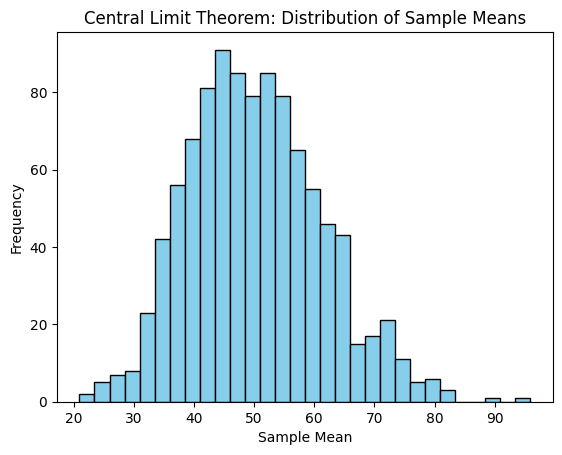

In [16]:
# Simulate CLT: Take 1000 samples of size 30 and calculate means
sample_means = [df['Close'].sample(30).mean() for _ in range(1000)]

# Plot histogram of sample means
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title("Central Limit Theorem: Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


### Confidence Interval

In [17]:
confidence_level = 0.95  # 95% confidence
mean_close = df['Close'].mean()
std_error = df['Close'].sem()  # Standard error of the mean

# Calculate Confidence Interval using t-distribution
ci_lower = mean_close - stats.t.ppf(1 - (1 - confidence_level) / 2, df['Close'].shape[0] - 1) * std_error
ci_upper = mean_close + stats.t.ppf(1 - (1 - confidence_level) / 2, df['Close'].shape[0] - 1) * std_error

# Display the Confidence Interval
print(f"Confidence Interval for Mean of Close Price: ({ci_lower:.2f}, {ci_upper:.2f})")


Confidence Interval for Mean of Close Price: (50.57, 50.81)


### Hypothesis Testing

In [27]:
# Hypothesis Testing (T-test) for Close Price
population_mean = 10000  # Example population mean

# Perform T-Test
t_stat, p_value = stats.ttest_1samp(df['Close'], population_mean)

# Display the result of the T-test
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Check if p-value is less than 0.05 (significance level)
if p_value < 0.05:
    print("Reject the null hypothesis: The mean of Close price is significantly different from 10,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 10,000.")


T-Statistic: nan, P-Value: nan
Fail to reject the null hypothesis: No significant difference from 10,000.


### Z-score

In [18]:
# Calculate Z-Score for 'Close' price values
z_scores = (df['Close'] - df['Close'].mean()) / df['Close'].std()

# Display Z-scores for the first few entries
print("Z-scores for Close price:\n", z_scores.head())


Z-scores for Close price:
 0   -0.753021
1   -0.753021
2   -0.753021
3   -0.753021
4   -0.753021
Name: Close, dtype: float64


## Visualization

### Time Series Plot

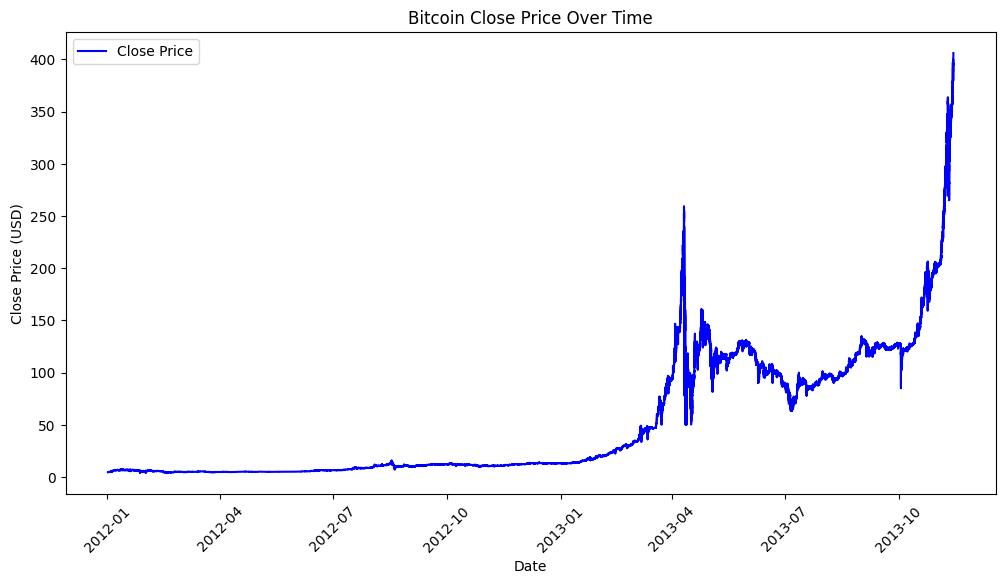

In [19]:
# Time Series Plot of Close price
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['Close'], label="Close Price", color='blue')
plt.title("Bitcoin Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Boxplot

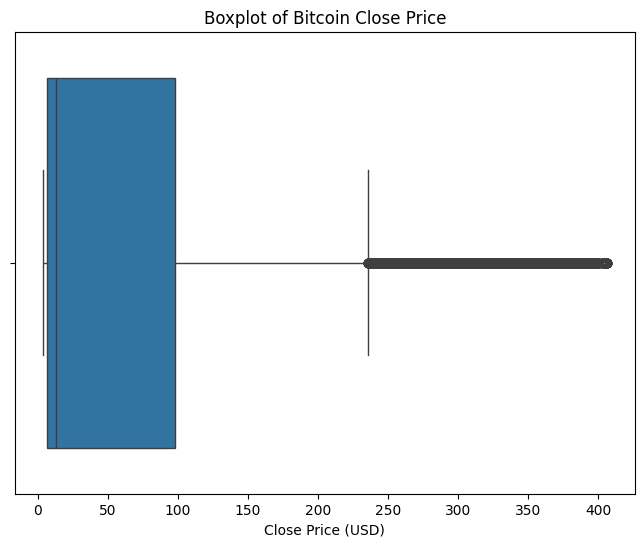

In [20]:
# Boxplot for Close price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.show()


### Histogram

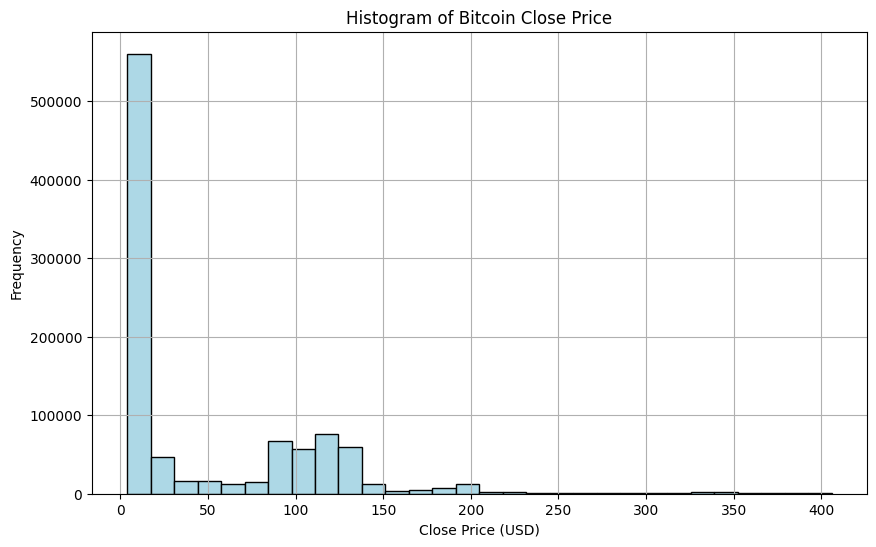

In [21]:
# Histogram for Close price distribution
plt.figure(figsize=(10, 6))
df['Close'].hist(bins=30, edgecolor='black', color='lightblue')
plt.title("Histogram of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.ylabel("Frequency")
plt.show()


### Density Plot

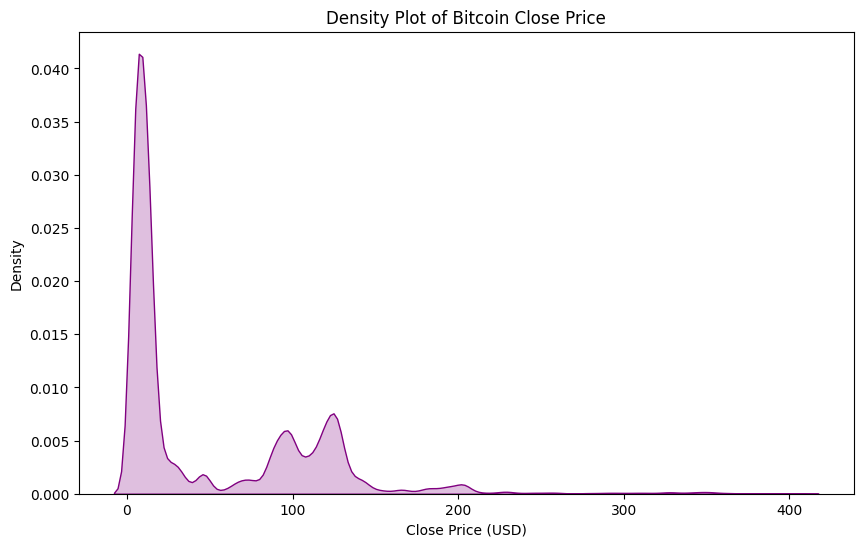

In [22]:
# Density plot for Close price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Close'], color='purple', fill=True)
plt.title("Density Plot of Bitcoin Close Price")
plt.xlabel("Close Price (USD)")
plt.ylabel("Density")
plt.show()


### Correlation Heatmap

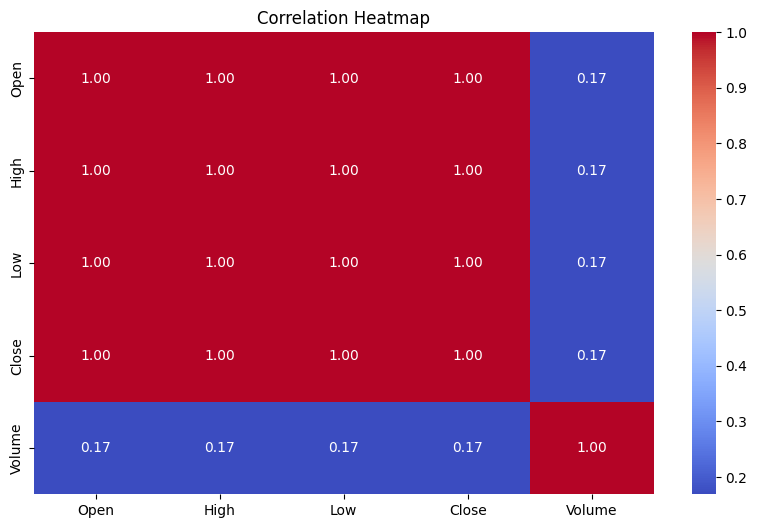

In [23]:
# Correlation heatmap for the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Scatterplot

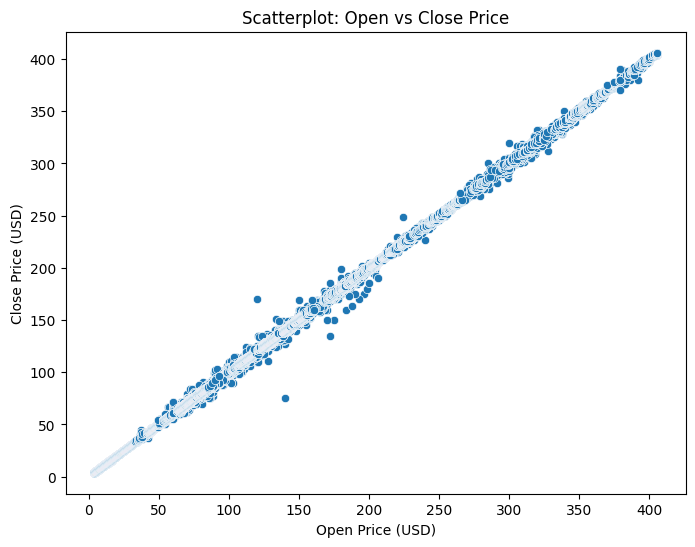

In [24]:
# Scatterplot: Open vs Close price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df_numeric)
plt.title("Scatterplot: Open vs Close Price")
plt.xlabel("Open Price (USD)")
plt.ylabel("Close Price (USD)")
plt.show()


## Time-based Analysis

### Resampling for Time-based Analysis

<ipython-input-25-be51d2002a41>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled_monthly = df.set_index('datetime').resample('M')['Close'].mean()


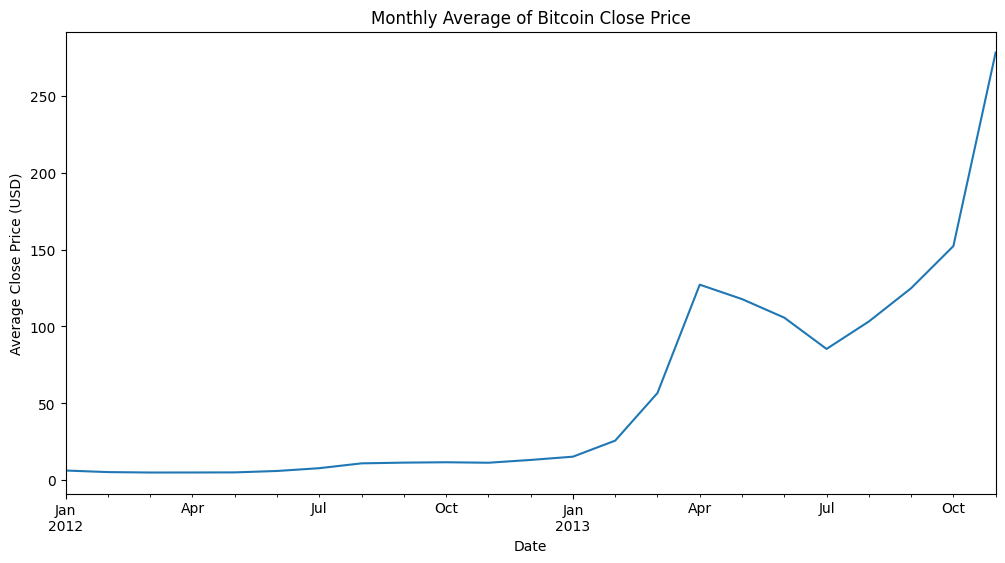

In [25]:
# Resampling the dataset to monthly frequency and calculating mean of Close price
df_resampled_monthly = df.set_index('datetime').resample('M')['Close'].mean()

# Plotting resampled Close price
plt.figure(figsize=(12, 6))
df_resampled_monthly.plot()
plt.title("Monthly Average of Bitcoin Close Price")
plt.xlabel("Date")
plt.ylabel("Average Close Price (USD)")
plt.show()


### Moving Average

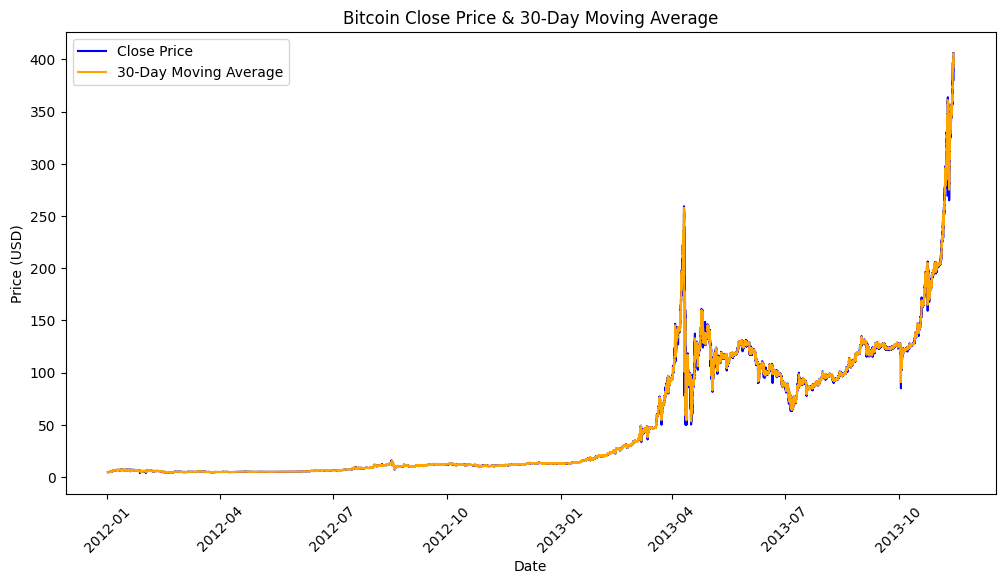

In [26]:
# Calculate moving average with a window size of 30 days
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()

# Plotting Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['Close'], label="Close Price", color='blue')
plt.plot(df['datetime'], df['Moving_Avg_30'], label="30-Day Moving Average", color='orange')
plt.title("Bitcoin Close Price & 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.show()